#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [223]:
# Read CSV
mydata = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
mydata.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [224]:
# mydata.duplicated()
print(mydata.duplicated().any()) 

True


Periksa apakah ada missing values

In [225]:
mydata.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

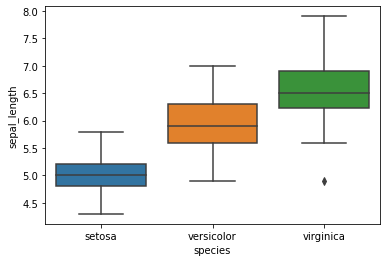

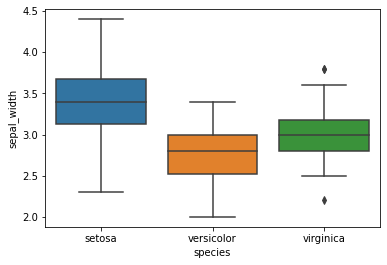

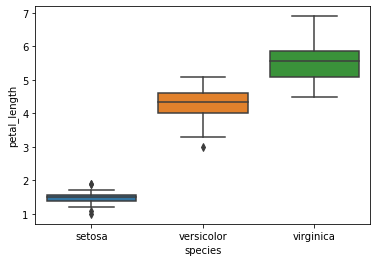

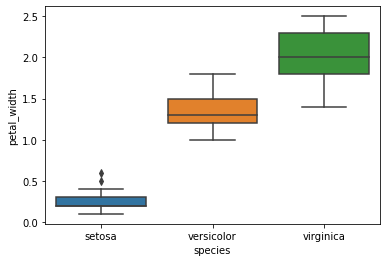

In [226]:
sns.boxplot( x=mydata["species"], y=mydata["sepal_length"])
plt.show()

sns.boxplot( x=mydata["species"], y=mydata["sepal_width"])
plt.show()

sns.boxplot( x=mydata["species"], y=mydata["petal_length"])
plt.show()

sns.boxplot( x=mydata["species"], y=mydata["petal_width"])
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [227]:
X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,-1].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [229]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [230]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [231]:
y_pred = (classifier.predict(X_test))
print(y_pred)

['virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica']


In [232]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:  [[5 0 0]
 [0 3 0]
 [0 1 6]]
Accuracy Score:  0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [239]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [240]:
y_pred = gnb.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [241]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:  [[5 0 0]
 [0 3 0]
 [0 1 6]]
Accuracy Score:  0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [236]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
classifier.fit(X_train, y_train) 

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [237]:
y_pred = (classifier.predict(X_test))
print(y_pred)

['virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica']


Ukur akurasi dari model K-Nearest Neighbor

In [238]:
y_pred = classifier.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:  [[5 0 0]
 [0 3 0]
 [0 1 6]]
Accuracy Score:  0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

Ketiga model klasifikasi diatas memiliki hasil accuracy score dan confusion matrix yang sama.
